# Quote How To 如何写出名人名言

“我也想写出名人名言，可是怎么样才行呢？可以通过数据教教我吗？”

In [1]:
!pip install pandas matplotlib networkx

## 常用词汇

基于已经爬取的名言数据items.jl，统计最常见的10种标签对应的名言中出现次数最多的词，并用适当的图表展示。

### 首先整理数据。

In [5]:
import pandas as pd
from collections import Counter

df = pd.read_json('items.jl', lines=True)

# your code here to define whatever stat variables
c= Counter()
tags_quotes = {}
for i, data in df.iterrows():
    # your code here to collect the stats
    c.update(data['tags'])
    quote = data.get('text', '')
    tags = data.get('tags', [])
    
    for tag in tags:
        if tag in tags_quotes:
            tags_quotes[tag].append(quote)
        else:
            tags_quotes[tag] = [quote]

tag_word_count = {}
common_tags = c.most_common(10)
for tag , k in common_tags:
    quote = tags_quotes[tag]
    words = ' '.join(quote).split()
    count_words = Counter(words)
    count_words = count_words.most_common(10)
    tag_word_count[tag] = count_words

all_word_count = {}
for tag, words in tag_word_count.items():
    for word, count in words:
        if word in all_word_count:
            all_word_count[word] += count
        else:
            all_word_count[word] = count
    


### 然后绘制图表。

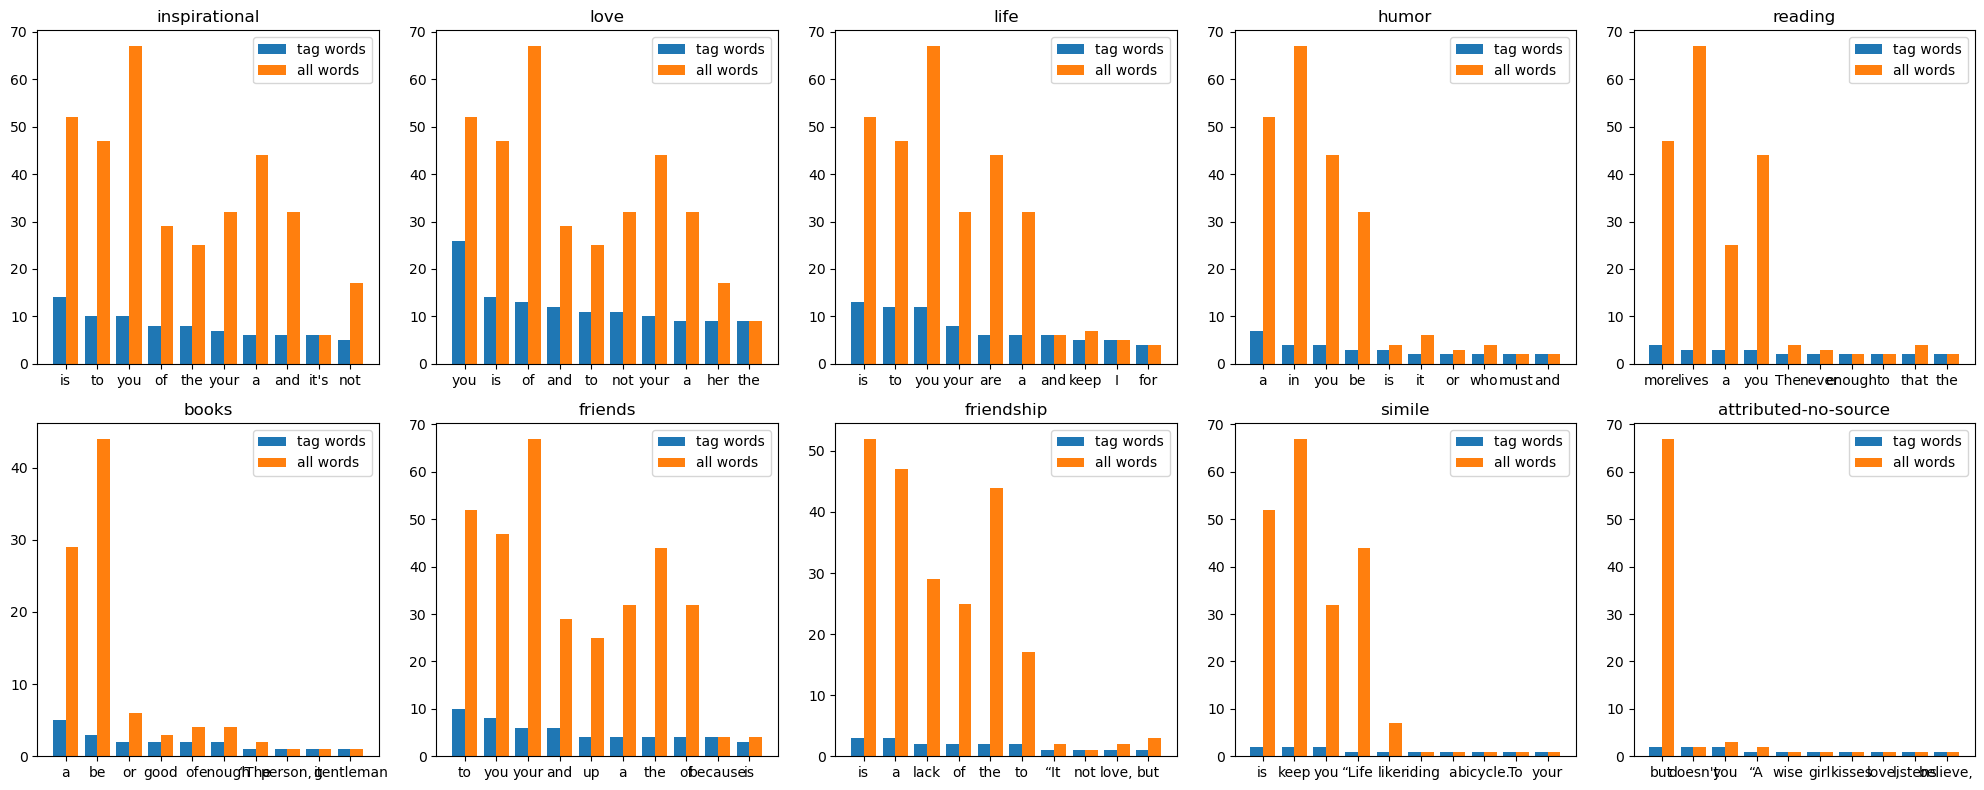

In [9]:
from itertools import product
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,5)
fig.set_figwidth(20)
fig.set_figheight(8)

# your code here to show the stats
for i, (tag, words) in enumerate(tag_word_count.items()):
    x = i // 5
    y = i % 5

    words_list =[word for word, count in words]
    counts_list = [count for word, count in words]

    all_words_list = [word for word, count in all_word_count.items() if word in words_list]
    all_counts_list = [count for word, count in all_word_count.items() if word in words_list]

    bar_width=0.4
    indices = range(len(words_list))
    ax[x,y].bar([index - bar_width/2 for index in indices], counts_list, bar_width, label='tag words')
    ax[x,y].bar([index + bar_width/2 for index in indices], all_counts_list, bar_width, label='all words')
    
    ax[x,y].set_title(tag)
    ax[x,y].set_xticks(indices)
    ax[x,y].set_xticklabels(words_list)
    ax[x,y].legend()

plt.tight_layout()
plt.show()


结果示例：

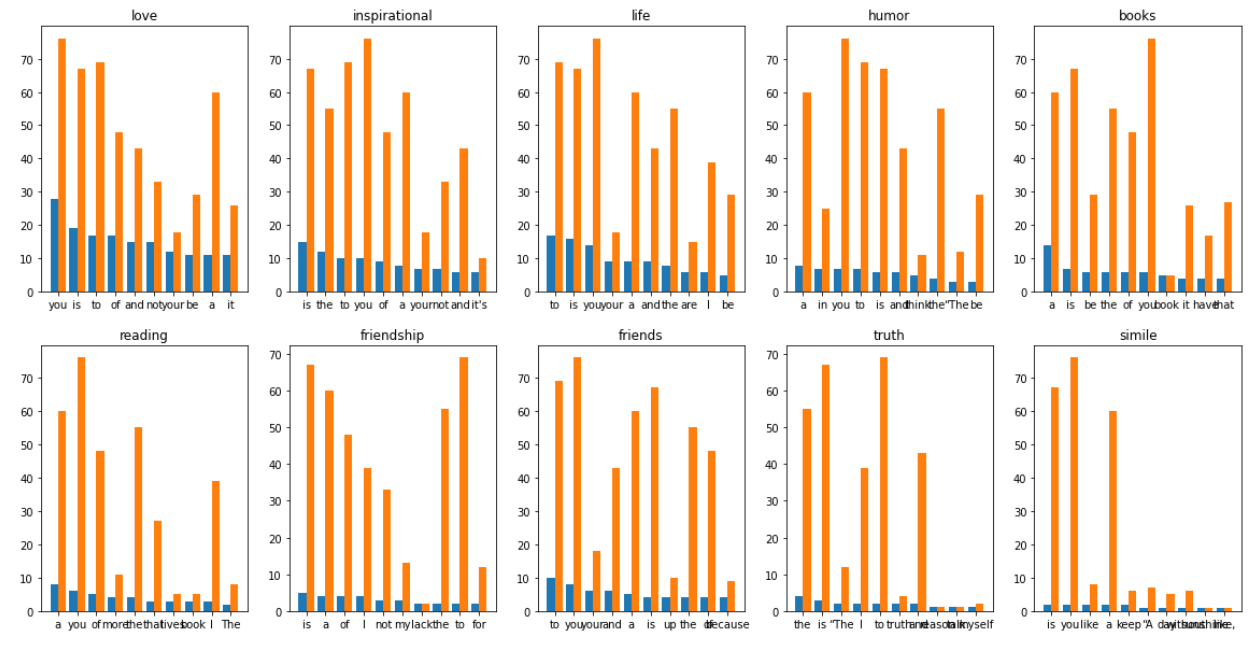

## 作者标签

基于已经爬取的名言数据items.jl，展示作者-标签关系网。

### 首先整理数据。

In [11]:
import pandas as pd
from collections import Counter

df = pd.read_json('items.jl', lines=True)

# your code here to define whatever relationship variables
authors_tags = {}

for i, data in df.iterrows():
    # your code here to collect the relationships
    author = data.get('author', '')
    tags = data.get('tags', [])
    if author not in authors_tags:
        authors_tags[author] = tags
    else:
        for tag in tags:
            if tag not in authors_tags[author]:
                authors_tags[author].append(tag)


### 然后构造关系网络。

In [13]:
import networkx as nx

G = nx.Graph()
# your code here to fill the graph
for author, tags in authors_tags.items():
    for tag in tags:
        G.add_edge(author, tag)


### 最后绘制图表。

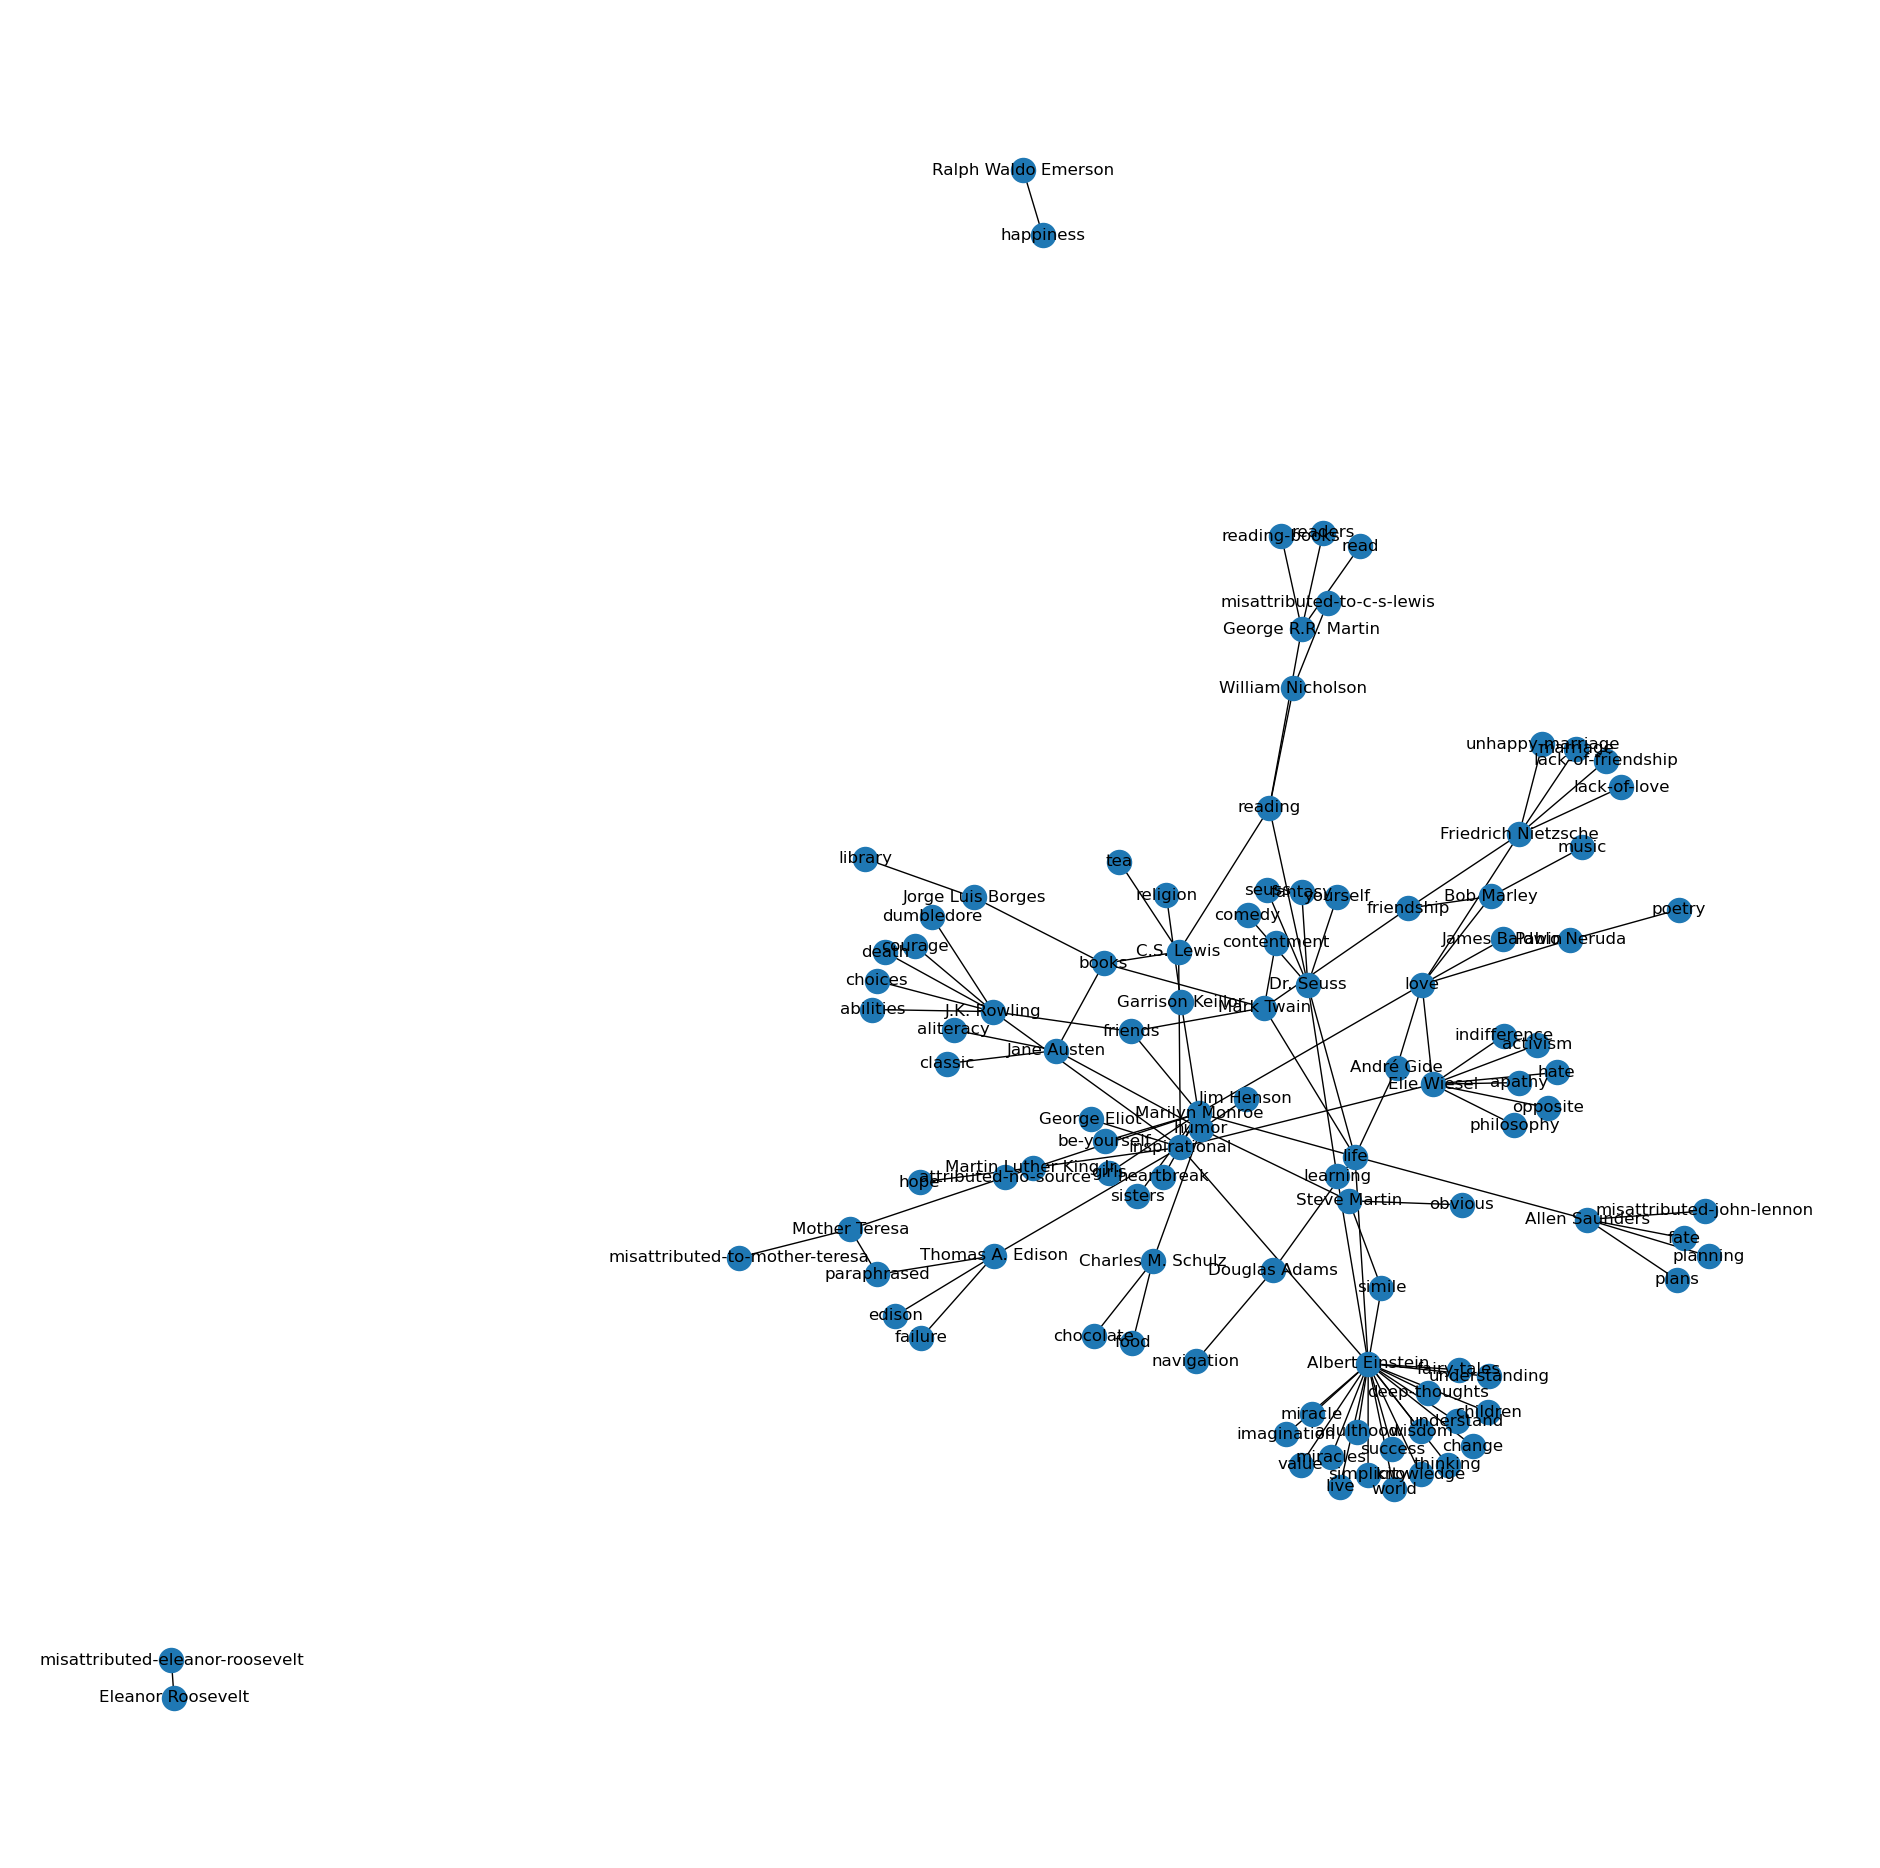

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(24)
nx.draw(G, ax=ax, with_labels=True)

结果示例：

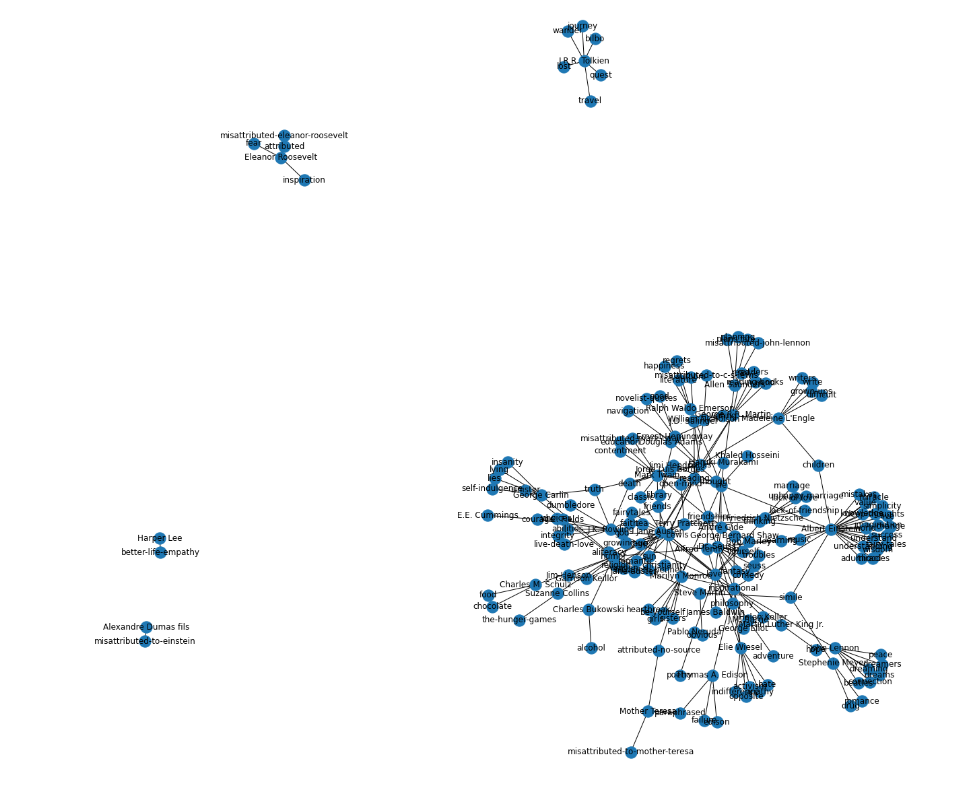